# Data Generating Processes (MACS 30100)
### by [Richard W. Evans](https://sites.google.com/site/rickecon/), January 2018
The code in this Jupyter notebook was written using Python 3.6. It also uses data file `HousePriceBeds.txt`. For the code to run properly, you should have the data file in the same folder as the Jupyter notebook file. Otherwise, you will have to change the line of the code that reads in the data to reflect the location of that data.

## 1. Data generating process (DGP) definition
A discussion about the data generating process (DGP) is really a discussion about the model. Models are a subset of DGPs. We define a DGP as the following.

> **Definition: Data Generating Process (DGP)**
> A data generating process is a mathematical relationship among variables meant to represent the relationships between those variables.

> a) The variables in a DGP can be partitioned in such a way as to represent exogenous variables (inputs) and endogenous variables (outputs)

> b) A DGP is completely specified in that it can be used to simulate synthetic data.

> c) A DGP is a model of the data (Note: a model need not be a DGP)

Let $X$ be a block of $I$ observations on $J$ variables with typical element $x_{i,j}$, where $i$ indexes the observation number and $j$ indexes the variable number. We can characterize a data generating process (DGP) as the following,

$$ F(X|\theta) = 0 $$

where $\theta$ is a vector of parameters relating variables of the model.

## 2. Examples of DGPs
The most common example of a DGP is a linear model. Partition the block of data into its many variables $X = (x_{i,1}, x_{i,2},...x_{i,j},...x_{i,J})$ for all $j$. Without loss of generality, we redifine the last variable in the data as $y_i = x_{i,J}$. A linear data generating process is:

$$ y_i = \beta_0 + \beta_1 x_{i,1} + \beta_2 x_{i,2} + ... + \varepsilon_i \quad \text{where}\quad \varepsilon_i\sim N(0,\sigma^2) $$

In our definition of a model from above, we have partitioned the data $X$ into exogenous variables $x_{i,1}, x_{i,2},...$, endogenous variables $y_i$, and parameters $\theta=(\beta_0,\beta_1, ...\sigma)$. We could rewrite this DGP as:

$$ F(y_i, x_{i,j}|\theta) \quad\text{or}\quad y_i = f(x_{i,j}|\theta) $$

Note that the linear model above is only a data generating process if we specify the distribution of the error term $\varepsilon_i\sim N(0,\sigma^2)$. Otherwise, we would not be able to simulate synthetic data.



[Give an example of a univariate linear model. Show how it is not fully specified if the errors are not specified. Show how to simulate data. give ]

Assume that the data generating process for house prices is simply a linear function of the number of bedrooms.

$$ HousePrice_i = \beta_0 + \beta_1 bedrooms_i + \varepsilon_i, \quad\text{where}\quad \varepsilon\sim N(0,\sigma^2) $$

In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
# This next command is specifically for Jupyter Notebook
%matplotlib notebook

hprice, bdrms = np.loadtxt('HousePriceBeds.txt', delimiter=',', unpack=True)

<IPython.core.display.Javascript object>


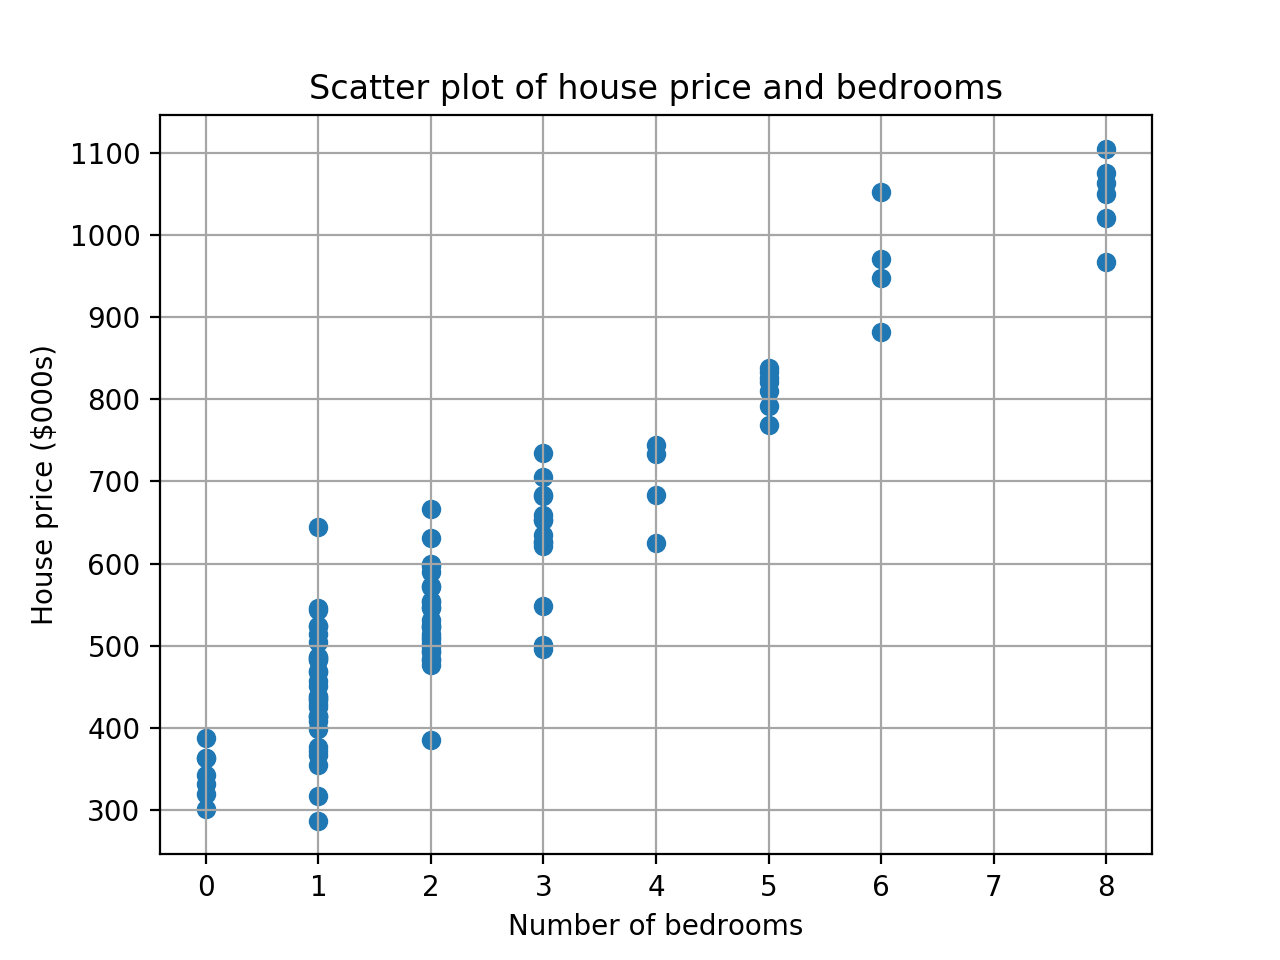

In [2]:
# Make scatter plot of house price data versus number of bedrooms
plt.scatter(bdrms, hprice/1000)
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.title('Scatter plot of house price and bedrooms')
plt.xlabel(r'Number of bedrooms')
plt.ylabel(r'House price (\$000s)')

If we wanted to simulate these data with our linear model, $HousePrice_i = \beta_0 + \beta_1 bedrooms_i + \varepsilon_i$, where $\varepsilon\sim N(0,\sigma^2)$, what would we need?

In [ ]:
# You could try predicting y_i with right hand side stuff

In [3]:
# You could try simulating some data
eps = sts.norm.rvs(loc=0, scale=1, size=(100))

You could even invert the model and solve for bedrooms as a function of house price.

$$ bdrms_i = - \frac{\beta_0}{\beta_1} + \frac{1}{\beta_1}HousePrice_i - \frac{1}{\beta_1}\varepsilon_i $$

In [ ]:
# You could even invert the model and solve for bedrooms as a function of house price

You could even write down a model of house prices that does not depend on any other variables other than random variables.

$$ F(HousePrice_i|\theta)=0 $$

If we create a histogram of the house price data, not conditional on anything else, it looks like we could model it as some type of distribution. (An example of a class of richer models for a single variable are kernel density estimators.) An example of $HousePrice_i$ being modeled as a distribution is the following:

$$ Pr(HousePrice_i=x|\theta) = LN(x\mu,\sigma^2) $$

We could then simulate house prices by drawing from that distribution.

In [ ]:
count, bins, ignored = plt.hist(hprice/1000, 30, normed=True)
plt.title('House prices in ChiTown', fontsize=20)
plt.xlabel(r'House price (\$000s)')
plt.ylabel('Percent of observations')
# plt.xlim([0, 550])  # This gives the xmin and xmax to be plotted"

The first step in an empirical study is to specify the data generating process (DGP). This reflects assumptions about the model--how the variables are related to one another, whether there is any uncertainty. Another important aspect of our models is using the "correct" parameters $\theta$. Because the output of a model depends on the parameter values chosen, estimation or calibration is important to discipline the model.